# Seminar 4.2: Bertrand konkurranse og differensierte produkter

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Bertrand konkurranse og differensiering

Vi antar at to bedrifter konkurrerer om forbrukere i en lineær by med jevnt fordelte forbrukere langs intervallet $[0,1]$. Bedrift 1 og bedrift 2 lokaliserer seg henholdsvis ved $x=0$ og $x=1$. For en forbruker med lokalisering $x$ blir nytten ved å kjøpe fra bedrift 1

$$
U_1 = V - P_1 - t\,x,
$$
og fra bedrift 2
$$
U_2 = V - P_2 - t\,(1-x),
$$

der $P_1$ og $P_2$ er prisene, $t$ er transportkostnaden, og $V$ er basisnytten.

Den marginale forbrukeren, med lokalisering $X_m$, er den forbrukeren som er likegyldig mellom de to alternativene. Dette gir betingelsen

$$
V - P_1 - t\,X_m = V - P_2 - t\,(1-X_m).
$$

Ved å fjerne $V$ og forenkle får vi

$$
-P_1 - t\,X_m = - P_2 - t + t\,X_m.
$$

Legg til $P_2 + t$ på begge sider:

$$
P_2 + t - P_1 = 2t\,X_m.
$$

Dermed blir den marginale forbrukerens lokalisering

$$
X_m = \frac{t + P_2 - P_1}{2t}.
$$

I symmetrisk likevekt, hvor $P_1 = P_2$, forenkles uttrykket til

$$
X_m = \frac{t}{2t} = \frac{1}{2}.
$$

Markedsandelen til bedrift 1 blir dermed $X_m$, mens bedrift 2 får $1-X_m$ av markedet.


In [2]:
# Definerer symboler
V,c, t, N, P_1,P_2,Q_1,Q_2,X_m = sp.symbols('V c t N P_1 P_2 Q_1 Q_2 X_m')

# Definerer likevektsbetingelser for bedrift 1
eq_1 = sp.Eq(V-P_1-t*X_m, V-P_2-t*(1-X_m))

# Definerer likevektsbetingelser for bedrift 2
eq_2 = sp.Eq(V-P_2-t*X_m, V-P_1-t*(1-X_m))

display(eq_1, eq_2)

Eq(-P_1 + V - X_m*t, -P_2 + V - t*(1 - X_m))

Eq(-P_2 + V - X_m*t, -P_1 + V - t*(1 - X_m))

In [3]:
# Løser for X_m for bedrift 1 og 2
X_m_1 = sp.solve(eq_1, X_m)[0]
X_m_2 = sp.solve(eq_2, X_m)[0]

display(X_m_1, X_m_2)

(-P_1 + P_2 + t)/(2*t)

(P_1 - P_2 + t)/(2*t)

## Visualisering av Hotelling-modellen

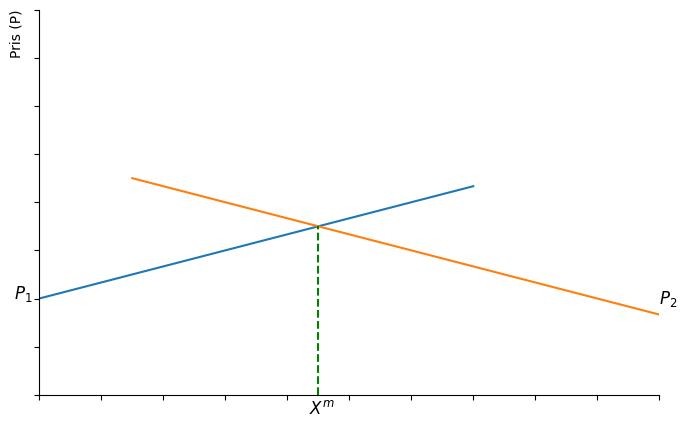

In [4]:
def etterspørsel(a, b, Q):
    return a + (Q/b)

def invers_etterspørsel(a, b, P):
    return a - b*P

#Q-verdier
Q = np.linspace(0.001, 1400, 1000)

Q_2 = np.linspace(0, 45, 1000)

#funksjon for å skape akse
def create_ax():
                fig, ax = plt.subplots(figsize=(8, 5))
                ax.set_ylabel('Pris (P)', loc='top', rotation=90)
                # set Pris label both left and right
                ax.yaxis.set_label_position('left')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                return fig, ax
            
fig, ax = create_ax()
ax.plot(Q, etterspørsel(20, 60, Q))
ax.plot(invers_etterspørsel(3000, 60, Q_2), Q_2)

ax.set(xlim=(0, 2000))
ax.set(ylim=(0, 80))

# vlines til likevekt
ax.vlines(x=900, ymin=0, ymax=35, color='g', linestyle='--')

# Symbol for X_m under v_lines linjen
ax.text(870, -4, r'$X^m$', fontsize=12, color='black')

# Symbol for P_1 og P_2
ax.text(-80, 20, r'$P_1$', fontsize=12, color='black')
ax.text(2000, 19, r'$P_2$', fontsize=12, color='black')

# fix x-ticks
ax.set_xticks(np.arange(0, 2200, 200))

plt.show()

## Bertrand-konkurranse og etterspørsel

For å finne markedsandelen, må vi multiplisere $X_{m1}$ for bedrift 1 og $X_{m2}$ for bedrift 2, med det totale antallet konsumenter, $N$, for å finne hvor mange konsumenter som kjøper fra hver bedrift.

$$
\text{Etterspørsel}_{B1} = X_{m1} \times N
$$

$$
\text{Etterspørsel}_{B2} = X_{m2} \times N
$$

Profittfunksjonene beregner vi ved å multiplisere enhetsfortjenesten, $P_1 - c$ eller $P_2 - c$, med mengden solgt (etterspørselen).

$$
\pi_{B1} = (P_1 - c) \times \text{Etterspørsel}_{B1}
$$

$$
\pi_{B2} = (P_2 - c) \times \text{Etterspørsel}_{B2}
$$

Vi finner førsteordensbetingelsene for profitmaksimering ved å derivere profittfunksjonene med hensyn til egen pris og sette derivert lik null.

$$
\frac{\partial \pi_{B1}}{\partial P_1} = 0 
$$

$$
\frac{\partial \pi_{B2}}{\partial P_2} = 0
$$

Og løser ligningene for $P_1$ og $P_2$ får vi reaksjonsfunksjonene, som gir den optimale prisen for en bedrift gitt konkurrentens pris.


$$
P_1 = R_1(P_2) 
$$

$$
P_2 = R_2(P_1)
$$

Til slutt substitueres den ene bedriftens reaksjonsfunksjon inn i den andres, slik at vi finner de simultane likevektsprisene for begge bedrifter.

$$
P_1 = R_1\Bigl(R_2(P_1)\Bigr)
$$

$$
P_2 = R_2\Bigl(R_1(P_2)\Bigr)
$$

In [5]:
# Etterspørsel for bedrift 1
Etterspørsel_B1 = X_m_1*N

# Etterspørsel for bedrift 2
Etterspørsel_B2 = X_m_2*N

display(Etterspørsel_B1, Etterspørsel_B2)

N*(-P_1 + P_2 + t)/(2*t)

N*(P_1 - P_2 + t)/(2*t)

In [6]:
# Profitt for bedrift 1
Profitt_B1 = (P_1-c)*Etterspørsel_B1

# Profitt for bedrift 2
Profitt_B2 = (P_2-c)*Etterspørsel_B2

display(Profitt_B1, Profitt_B2)

N*(P_1 - c)*(-P_1 + P_2 + t)/(2*t)

N*(P_2 - c)*(P_1 - P_2 + t)/(2*t)

In [7]:
# Finner optimal profitt for bedrift 1
Optimal_Profitt_B1 = sp.diff(Profitt_B1, P_1)

# Finner optimal profitt for bedrift 2
Optimal_Profitt_B2 = sp.diff(Profitt_B2, P_2)

display(Optimal_Profitt_B1, Optimal_Profitt_B2)

-N*(P_1 - c)/(2*t) + N*(-P_1 + P_2 + t)/(2*t)

-N*(P_2 - c)/(2*t) + N*(P_1 - P_2 + t)/(2*t)

In [8]:
# Finner reaksjonsfunksjon til bedrift 1
Reaksjonsfunksjon_B1 = sp.solve(Optimal_Profitt_B1, P_1)[0]

# Finner reaksjonsfunksjon til bedrift 2
Reaksjonsfunksjon_B2 = sp.solve(Optimal_Profitt_B2, P_2)[0]

display(Reaksjonsfunksjon_B1, Reaksjonsfunksjon_B2)

P_2/2 + c/2 + t/2

P_1/2 + c/2 + t/2

In [9]:
# Setter inn reaksjonsfunksjonen til bedrift 2 i reaksjonsfunksjonen til bedrift 1
likevekt_P1 = sp.Eq(P_1, Reaksjonsfunksjon_B1.subs(P_2, Reaksjonsfunksjon_B2))

# Setter inn reaksjonsfunksjonen til bedrift 1 i reaksjonsfunksjonen til bedrift 2
likevekt_P2 = sp.Eq(P_2, Reaksjonsfunksjon_B2.subs(P_1, Reaksjonsfunksjon_B1))

display(sp.simplify(likevekt_P1), sp.simplify(likevekt_P2))

Eq(P_1, c + t)

Eq(P_2, c + t)

In [10]:
# Alternativ løsning som gir samme resultat
sol = sp.solve([Optimal_Profitt_B1,Optimal_Profitt_B2], [P_1, P_2])

display(sol[P_1], sol[P_2])

c + t

c + t

## Eksempel

In [11]:
# Eksempelverdier
V = 100
c = 10
t = 1
N = 100

# Definerer likevektsbetingelser for bedrift 1
eq_1 = sp.Eq(V-P_1-t*X_m, V-P_2-t*(1-X_m))

# Definerer likevektsbetingelser for bedrift 2
eq_2 = sp.Eq(V-P_2-t*X_m, V-P_1-t*(1-X_m))

display(eq_1, eq_2)

Eq(-P_1 - X_m + 100, -P_2 + X_m + 99)

Eq(-P_2 - X_m + 100, -P_1 + X_m + 99)

In [12]:

# Løser for X_m for bedrift 1 og 2
X_m_1 = sp.solve(eq_1, X_m)[0]
X_m_2 = sp.solve(eq_2, X_m)[0]

display(X_m_1, X_m_2)

-P_1/2 + P_2/2 + 1/2

P_1/2 - P_2/2 + 1/2

In [13]:
# Etterspørsel for bedrift 1
Etterspørsel_B1 = X_m_1*N

# Etterspørsel for bedrift 2
Etterspørsel_B2 = X_m_2*N

display(Etterspørsel_B1, Etterspørsel_B2)

-50*P_1 + 50*P_2 + 50

50*P_1 - 50*P_2 + 50

In [14]:
# Profitt for bedrift 1
Profitt_B1 = (P_1-c)*Etterspørsel_B1

# Profitt for bedrift 2
Profitt_B2 = (P_2-c)*Etterspørsel_B2

display(Profitt_B1, Profitt_B2)

(P_1 - 10)*(-50*P_1 + 50*P_2 + 50)

(P_2 - 10)*(50*P_1 - 50*P_2 + 50)

In [15]:
# Finner optimal profitt for bedrift 1
Optimal_Profitt_B1 = sp.diff(Profitt_B1, P_1)

# Finner optimal profitt for bedrift 2
Optimal_Profitt_B2 = sp.diff(Profitt_B2, P_2)

display(Optimal_Profitt_B1, Optimal_Profitt_B2)

-100*P_1 + 50*P_2 + 550

50*P_1 - 100*P_2 + 550

In [16]:
# Optimal pris for bedrift 1 og 2
sol = sp.solve([Optimal_Profitt_B1,Optimal_Profitt_B2], [P_1, P_2])

display(sol[P_1], sol[P_2])

11

11

In [17]:
# Finner profitt for bedrift 1 og 2
display(Profitt_B1.subs(sol), Profitt_B2.subs(sol))


50

50

Optimal pris for bedrift 1 og 2 blir 11 kroner per enhet, og profitten deres blir 50.

## Oppgave Bertrand konkurranse og differensiering

I denne oppgaven skal du anta at den «lineære byen» er ved Strandtorget hvor Kaffebønna er lokalisert i den ene enden av gata og Risø mat & kaffebar er lokalisert i den andre enden av gata.

Anta at det er 30 000 kunder (N=30 000) som er jevnt fordelt langs lokaliseringsområdet til utsalgsstedene, og at hver kunde kjøper en kopp kaffe per dag. 

Kostnaden ved å produsere en kopp kaffe er NOK 5, og bedriftene har faste kostnader per utsalgssted på NOK 25 000.

Transportkostnadene for kundene er på NOK 50. 

a) Bruk en Hotelling modell og vis hvordan disse to kaffebarene vil tilpasse seg i dette markedet. Hva er optimal pris på en kopp kaffe og hva blir profitten til Kaffebønna og Risø?